## Import Libraries

In [ ]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## Load Files

In [210]:
# load CSV of championship results into a dataframe and display first 10 records

championship_df = pd.read_csv("resources/yh-championship-data.csv")
championship_df.head(10)

,Year,Division,Horse,OverallPlacing,HighestLevel,CDI,USDFNumber,OverallScore
0,2002,FEI5,Rosabella,1,Third Level,No,37232,7.84
1,2002,FEI5,Favereux,2,Grand Prix,No,38714,7.68
2,2002,FEI5,Devon,3,Third Level,No,38984,7.42
3,2002,FEI5,Welfenstein,4,Grand Prix,Yes,40474,7.14
4,2002,FEI5,R-tistik,5,Grand Prix,Yes,37123,7.10
5,2002,FEI5,Pampero,6,FEI 5 Year Old,No,41386,6.82
6,2002,FEI6,Oleander,1,Grand Prix,Yes,35062,8.24
7,2002,FEI6,Freestyle,2,Prix St. Georges,No,39380,7.40
8,2002,FEI6,Wincenzo,3,Prix St. Georges,No,1026740,7.00
9,2002,FEI6,Olympus,4,Grand Prix,Yes,42683,6.86


In [44]:
# load CSV of horse data into a dataframe and display first 10 results

horse_df = pd.read_csv("resources/yh-horse-data.csv")
horse_df.head(10)


,Horse,HighestLevel,CDI,USDFNumber,Sire,Damsire,Country,Breeder,Studbook,InternationalTeam,TeamMade
0,Rosabella,Third Level,No,37232,Rohdiamant,Watzmann,Germany,Kerstin Ohlemeyer,Hanoverian,No,NaN
1,Favereux,Grand Prix,No,38714,Fidermark,Fidelio,Germany,Johannes Hilgers,Rhinelander,No,NaN
2,Devon,Third Level,No,38984,Don Gregory,NaN,NaN,NaN,Oldenburg,No,NaN
3,Welfenstein,Grand Prix,Yes,40474,Wolkenstein II,Lauries Crusador xx,Germany,Heinz Bruns,Hanoverian,No,NaN
4,R-tistik,Grand Prix,Yes,37123,Ramires,Rex Fritz,Germany,Josef Kathmann,Oldenburg,No,NaN
5,Pampero,FEI 5 Year Old,No,41386,Ferro,NaN,USA,Margaret Avery,KWPN,No,NaN
6,Oleander,Grand Prix,Yes,35062,Jazz,Ulft,Netherlands,R. Van Wourdenbergh,KWPN,No,NaN
7,Freestyle,Prix St. Georges,No,39380,Florestan I,Parademarsch I,Germany,NaN,Westfalen,No,NaN
8,Wincenzo,Prix St. Georges,No,1026740,Werther,Graphit,Germany,NaN,Hanoverian,No,NaN
9,Olympus,Grand Prix,Yes,42683,Clavecimbel,NaN,Netherlands,G. Van Der Veen,KWPN,No,NaN


In [247]:
# create merged dataframe, drop and rename extra columns

merged_df = pd.merge(championship_df, horse_df, on='USDFNumber')
merged_df = merged_df.drop(columns =['Horse_y', 'HighestLevel_x', 'CDI_y'])
merged_df = merged_df.rename(columns={'Horse_x': 'Horse', 'CDI_x': 'CDI Competitor', 'HighestLevel_y': 'Highest Level', 'Country': 'Country Bred', 'TeamMade': 'Team Made'})
merged_df.head(10) 

,Year,Division,Horse,OverallPlacing,CDI Competitor,USDFNumber,OverallScore,Highest Level,Sire,Damsire,Country Bred,Breeder,Studbook,InternationalTeam,Team Made
0,2002,FEI5,Rosabella,1,No,37232,7.84,Third Level,Rohdiamant,Watzmann,Germany,Kerstin Ohlemeyer,Hanoverian,No,NaN
1,2002,FEI5,Favereux,2,No,38714,7.68,Grand Prix,Fidermark,Fidelio,Germany,Johannes Hilgers,Rhinelander,No,NaN
2,2002,FEI5,Devon,3,No,38984,7.42,Third Level,Don Gregory,NaN,NaN,NaN,Oldenburg,No,NaN
3,2002,FEI5,Welfenstein,4,Yes,40474,7.14,Grand Prix,Wolkenstein II,Lauries Crusador xx,Germany,Heinz Bruns,Hanoverian,No,NaN
4,2002,FEI5,R-tistik,5,Yes,37123,7.10,Grand Prix,Ramires,Rex Fritz,Germany,Josef Kathmann,Oldenburg,No,NaN
5,2002,FEI5,Pampero,6,No,41386,6.82,FEI 5 Year Old,Ferro,NaN,USA,Margaret Avery,KWPN,No,NaN
6,2002,FEI6,Oleander,1,Yes,35062,8.24,Grand Prix,Jazz,Ulft,Netherlands,R. Van Wourdenbergh,KWPN,No,NaN
7,2002,FEI6,Freestyle,2,No,39380,7.40,Prix St. Georges,Florestan I,Parademarsch I,Germany,NaN,Westfalen,No,NaN
8,2002,FEI6,Wincenzo,3,No,1026740,7.00,Prix St. Georges,Werther,Graphit,Germany,NaN,Hanoverian,No,NaN
9,2002,FEI6,Olympus,4,Yes,42683,6.86,Grand Prix,Clavecimbel,NaN,Netherlands,G. Van Der Veen,KWPN,No,NaN


In [4]:
# get count of null values by column for horse dataframe

horse_df.isnull().sum(axis = 0)

Horse            0
HighestLevel     0
CDI              0
USDFNumber       0
Sire             1
Damsire         18
Country          8
Breeder         47
Studbook         1
dtype: int64

In [32]:
# get count of null values by column for championship dataframe

championship_df.isnull().sum(axis = 0)

Year              0
Division          0
Horse             0
OverallPlacing    0
HighestLevel      0
CDI               0
USDFNumber        0
OverallScore      0
dtype: int64

## Analysis of Competitive Outcomes, 2002-2019

In [269]:
# get the total number of horses that competed in the 4/5/6 year old divisions from 2002-2019

total_horses = championship_df.loc[(championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
total_horses = total_horses.drop_duplicates(subset=['USDFNumber'])
total_horses_count = total_horses["USDFNumber"].count()

print(f"The total number of horses competing from 2002-2019 is {total_horses_count}.")

The total number of horses competing from 2002-2019 is 520.


In [261]:
# get the overall number of horses that have competed in at least one CDI (any level other than Young Horse divisions)
# from 2002-2019, that competed in the 4/5/6/ year old divisions during those years

cdi_horses = championship_df.loc[(championship_df["CDI"] == "Yes") & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
cdi_count = cdi_horses["USDFNumber"].nunique()


print(f"The number of CDI competitors is {cdi_count}.")

The number of CDI competitors is 169.


In [262]:
# get the overall percentage of horses that competed in at least one CDI 

cdi_percentage = (cdi_count / total_horses) * 100
cdi_percentage = round(cdi_percentage, 2)

print(f"The percentage of CDI competitors is {cdi_percentage}%")

The percentage of CDI competitors is 32.5%


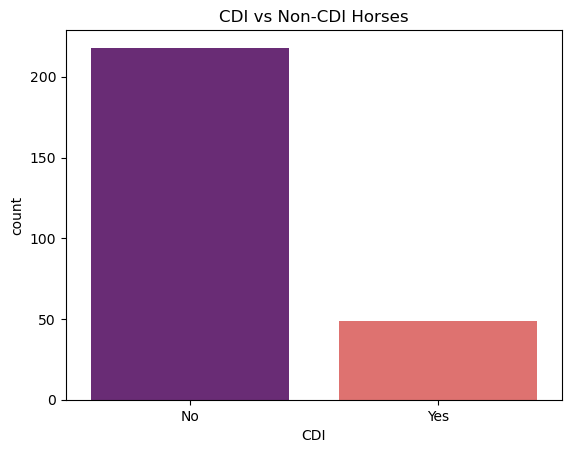

In [510]:
#  create a bar chart to visualize CDI vs non-CDI horse data

sns.countplot(
   x = 'CDI',
   data = total_horses,
   palette = 'magma',
   order = total_horses["CDI"].value_counts().index
)

plt.title("CDI vs Non-CDI Horses")
plt.savefig('images/cdi-competitors.png')
plt.show()

In [9]:
# get the number of horses that competed to Grand Prix from 2002-2019, that competed in the 4/5/6/ year old divisions during those years

grandprix_horses = championship_df.loc[(championship_df["HighestLevel"] == "Grand Prix") & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
grandprix_horses = grandprix_horses["USDFNumber"].nunique()


print(f"The number of Grand Prix horses is {grandprix_horses}.")

The number of Grand Prix horses is 138.


In [10]:
# get the percentage of all horses that competed at Grand Prix, from 2002-2019,that competed in the 4/5/6 year old divisions during those years

grand_prix_percentage = (grandprix_horses / total_horses) * 100
grand_prix_percentage = round(grand_prix_percentage, 2)

print(f"The percentage of Grand Prix horses is {grand_prix_percentage}%.")

The percentage of Grand Prix horses is 26.54%.


In [41]:
# get the horses that have competed at FEI from 2002-2019

levels = ['Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges','FEI Junior']

fei_df = championship_df[(championship_df['HighestLevel'].isin(levels)) & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
fei_df = fei_df["USDFNumber"].nunique()

print(f"The number of horses that competed at FEI is {fei_df}.")

The number of horses that competed at FEI is 363.


In [15]:
# get the percentage of horses that have competed at FEI 

fei_percentage = (fei_df / total_horses) * 100
fei_percentage = round(fei_percentage, 2)
print(f"The percentage of horses that competed at FEI is {fei_percentage}%.")

The percentage of horses that competed at FEI is 69.81%.


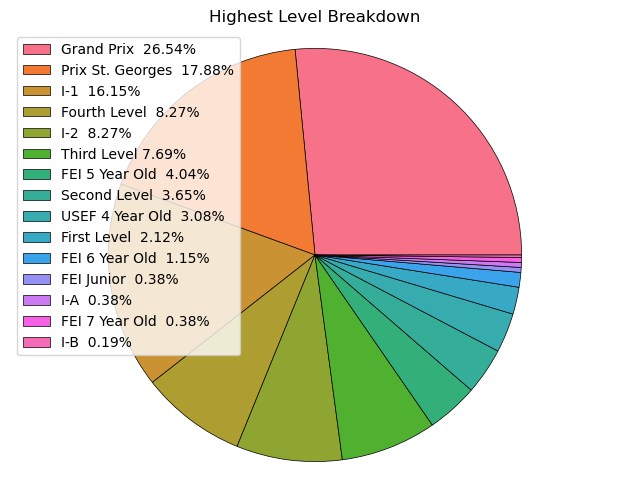

In [509]:
# create a pie chart to display the breakdown of highest level competed

# select by years and division
all_level_groups = championship_df[(championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
# drop duplicate values 
all_level_groups = all_level_groups.drop_duplicates(subset=['USDFNumber'])
# get the counts for each level
all_level_count = all_level_groups["HighestLevel"].value_counts()
# create labels for legend 
all_level_labels = ['Grand Prix  26.54%', 'Prix St. Georges  17.88%', 'I-1  16.15%', 'Fourth Level  8.27%', 'I-2  8.27%', 'Third Level 7.69%', 'FEI 5 Year Old  4.04%', 
'Second Level  3.65%', 'USEF 4 Year Old  3.08%', 'First Level  2.12%', 'FEI 6 Year Old  1.15%', 'FEI Junior  0.38%', 'I-A  0.38%', 'FEI 7 Year Old  0.38%', 'I-B  0.19%']

# set color palette
palette_color = sns.color_palette('husl', 15)
colors = []

# display pie chart
patches, colors = plt.pie(all_level_count, colors=palette_color, wedgeprops = {"edgecolor" : "black", 
                      'linewidth': .5, 
                      'antialiased': True})
plt.legend(patches,all_level_labels, loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.title("Highest Level Breakdown")
plt.savefig('images/highest-level-breakdown.png')
plt.show()

In [211]:
all_level_count

Grand Prix          138
Prix St. Georges     93
I-1                  84
Fourth Level         43
I-2                  43
Third Level          39
FEI 5 Year Old       21
Second Level         19
USEF 4 Year Old      16
First Level          11
FEI 6 Year Old        6
FEI Junior            2
I-A                   2
FEI 7 Year Old        2
I-B                   1
Name: HighestLevel, dtype: int64

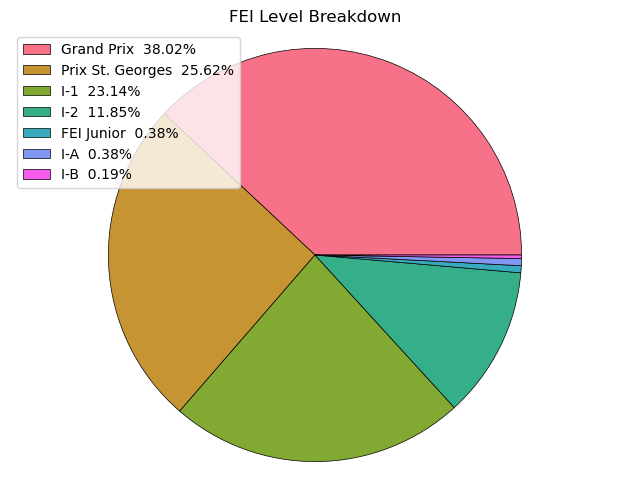

In [511]:
# create pie chart of the breakdown of levels achieved by horses that made it to FEI 

fei_level_groups = championship_df[(championship_df['HighestLevel'].isin(levels)) & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
# drop duplicate values
fei_level_groups = fei_level_groups.drop_duplicates(subset=['USDFNumber'])
# get the counts for each level
fei_level_count = fei_level_groups["HighestLevel"].value_counts()
# create labels for legend
fei_labels = ['Grand Prix  38.02%', 'Prix St. Georges  25.62%', 'I-1  23.14%', 'I-2  11.85%','FEI Junior  0.38%', 'I-A  0.38%', 'I-B  0.19%']


palette_color = sns.color_palette('husl', 7)
colors = ['#b73779', '#2c115f', '#721481', '#f1605d', '#feb078', '#fcfdbf', '#000004']

patches, color = plt.pie(fei_level_count, colors=palette_color, wedgeprops = {"edgecolor" : "black", 
                      'linewidth': .5, 
                      'antialiased': True})
plt.legend(patches,fei_labels, loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.title("FEI Level Breakdown")
plt.savefig('images/fei-level-breakdown.png')
plt.show()

In [250]:
# get a list of the horses that went on to make an international team (Pan American or Olympic Games) that competed in the 4/5/6 year old divisions from 2002-2019

team_df = merged_df[(merged_df["Year"] <= 2019) & (merged_df["InternationalTeam"] == "Yes") &
                             (merged_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
team_df = team_df.drop_duplicates(subset='USDFNumber')
team_df = team_df.drop(columns =['Year', 'Division', 'CDI Competitor', 'USDFNumber', 'OverallScore', 'OverallPlacing','Highest Level', 'InternationalTeam'])
team_df

,Horse,Sire,Damsire,Country Bred,Breeder,Studbook,Team Made
166,Grandioso,Grosso Z,Palisandergrund,Germany,Willi Hillebrecht,Westfalen,Pan American Games
238,Selten HW,Sandro Hit,Hohenstein,USA,Irene Hoeflich-Wiederhold,Hanoverian,Olympic Games
399,Sanceo,San Remo,Ramiro's Son II,Germany,Gerhard Dustmann,Hanoverian,Olympic Games and Pan American Games
633,Lucky Strike,Lord Laurie,His Highness,Germany,Monika Hartwitch,Hanoverian,Pan American Games


In [70]:
# get the count of team horses

team_count = len(team_df)

# get the percentage of team horses

team_percentage = (team_count / total_horses) * 100
team_percentage = round(team_percentage, 2)

print(f"The percentage of horses that made an international team is {team_percentage}%")

The percentage of horses that made an international team is 0.77%


In [71]:
# create summary table of overall horse statistics

horse_summary = pd.DataFrame({"Total Horses": [total_horses], "Total FEI Horses": fei_df,
                            "Percentage of FEI Horses": fei_percentage, 
                            "Total CDI Horses": cdi_horses,
                            "Percentage of CDI Horses": cdi_percentage,
                            "Total Grand Prix Horses": grandprix_horses,
                            "Percentage of Grand Prix Horses": grand_prix_percentage,
                            "Total Team Horses": team_count,
                            "Percentage of Team Horses": team_percentage})


horse_summary

,Total Horses,Total FEI Horses,Percentage of FEI Horses,Total CDI Horses,Percentage of CDI Horses,Total Grand Prix Horses,Percentage of Grand Prix Horses,Total Team Horses,Percentage of Team Horses
0,520,363,69.81,169,32.5,138,26.54,4,0.77


In [270]:
# get the number of FEI horses that placed in the top 10 of their division at the championships between 2002-2019

placing = [1,2,3,4,5,6,7,8,9,10]
levels = ['Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges','FEI Junior']

top_ten = championship_df[(championship_df['OverallPlacing'].isin(placing)) & (championship_df['HighestLevel'].isin(levels))
                          & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]

top_ten = top_ten.drop_duplicates(subset='USDFNumber')

top_ten_count = top_ten["USDFNumber"].count()

print(f"{top_ten_count} horses placed in the top 10 of their division.")




280 horses placed in the top 10 of their division.


In [521]:
print(top_ten.to_markdown())

|     |   Year | Division   | Horse                  |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|----:|-------:|:-----------|:-----------------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|   1 |   2002 | FEI5       | Favereux               |                2 | Grand Prix       | No    |        38714 |          7.68  |
|   3 |   2002 | FEI5       | Welfenstein            |                4 | Grand Prix       | Yes   |        40474 |          7.14  |
|   4 |   2002 | FEI5       | R-tistik               |                5 | Grand Prix       | Yes   |        37123 |          7.1   |
|   6 |   2002 | FEI6       | Oleander               |                1 | Grand Prix       | Yes   |        35062 |          8.24  |
|   7 |   2002 | FEI6       | Freestyle              |                2 | Prix St. Georges | No    |        39380 |          7.4   |
|   8 |   2002 | FEI6       | Wincenzo               |               

In [533]:
# get the number of FEI horses that placed in the bottom 10 of their division between 2002-2019

lower_placing = [11,12,13,14,15,16,17,18,19,20]
levels = ['Grand Prix', 'I-2', 'I-A', 'I-B', 'I-1', 'Prix St. Georges','FEI Junior']

bottom_ten = championship_df[(championship_df['OverallPlacing'].isin(lower_placing)) & (championship_df['HighestLevel'].isin(levels))
                          & (championship_df["Year"] <= 2019) &
                             (championship_df["Division"].str.contains("USEF4|FEI5|FEI6"))]
bottom_ten = bottom_ten.drop_duplicates(subset='USDFNumber')

bottom_ten_count = bottom_ten["USDFNumber"].count()

print(f"{bottom_ten_count} horses placed in the bottom 10 of their division.")

111 horses placed in the bottom 10 of their division.


In [382]:
# get the percentage of FEI horses in the top ten of their division

top_ten_percentage = (top_ten / fei_df) * 100
top_ten_percentage = round(top_ten_percentage, 2)

print(f"The percentage of horses placing in the top ten of their division is {top_ten_percentage}%.")

The percentage of horses placing in the top ten of their division is 77.13%.


In [383]:
# get the percentage of FEI horses in the top ten of their division

bottom_ten_percentage = (bottom_ten / fei_df) * 100
bottom_ten_percentage = round(bottom_ten_percentage, 2)

print(f"The percentage of horses placing in the top ten of their division is {bottom_ten_percentage}%.")

The percentage of horses placing in the top ten of their division is 30.58%.


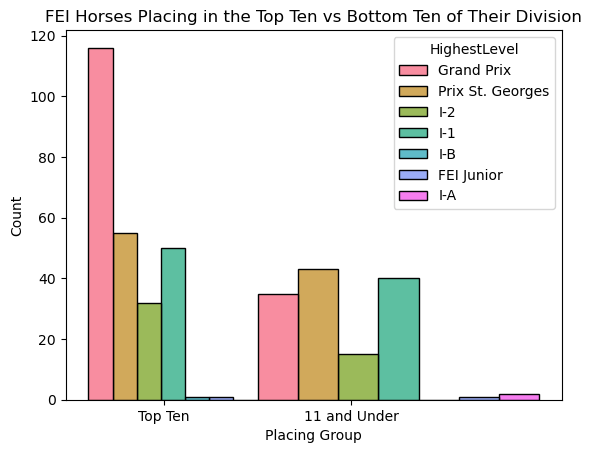

In [541]:
# create a histogram of FEI horses by placing 

# concatonate top ten and bottom ten dataframes
frames = [top_ten, bottom_ten]
placing_group = pd.concat(frames)

# set up bins and labels
placing_bins = [1, 10, 25]
placing_labels = ['Top Ten', '11 and Under']

# set up histogram
ax = sns.histplot(x='OverallPlacing', bins=placing_bins, hue='HighestLevel', palette='husl', alpha=0.8,multiple='dodge', data=placing_group)

#fei_level_groups = fei_level_groups[(fei_level_groups['OverallPlacing'])]
#print(np.histogram(placing_group, bins=placing_bins))

# set xticks and xticks labels, xlabel, and title
ax.set_xticks([5,15])
ax.set_xticklabels(placing_labels)
ax.set_title('FEI Horses Placing in the Top Ten vs Bottom Ten of Their Division')
ax.set_xlabel('Placing Group')

# show and save figure
plt.savefig('images/fei-by-placing.png')
plt.show()



## Analysis of Scores by Division, 2002-2023

In [354]:
# get the median scores by division over all years (2002-2023)

score_groups = championship_df.groupby(["Division"])["OverallScore"]

score_group_count = championship_df.groupby(["Division"])["OverallScore"].count()

# create a dataframe of summary statistics for all divisions over all years

score_summary = pd.DataFrame({"Number of Scores": score_group_count,
                             "Mean Score": score_groups.mean(),
                              "Median Score": score_groups.median(),
                              "Standard Deviation": score_groups.std(),
                              "Variance": score_groups.var()}) 

score_summary


,Number of Scores,Mean Score,Median Score,Standard Deviation,Variance
Division,,,,,
DHGP,121,64.192818,64.8880,6.624170,43.879629
DHPSG,241,66.490763,67.3390,5.706541,32.564612
FEI5,291,7.530285,7.5840,0.872500,0.761256
FEI6,276,7.377841,7.5040,1.012005,1.024154
FEI7,28,70.621929,71.3295,8.939749,79.919104
USEF4,267,7.592322,7.6200,0.801735,0.642779


|      |   Year | Division   | Horse          |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:---------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|  176 |   2007 | USEF4      | Rebecca        |               20 | Second Level     | No    |      1063158 |          5.94  |
|  525 |   2013 | USEF4      | Floretienne    |               14 | Grand Prix       | Yes   |      1101450 |          2.792 |
|  717 |   2016 | USEF4      | Jagger         |               14 | Prix St. Georges | Yes   |      1111241 |          3.048 |
| 1128 |   2022 | USEF4      | Furst Dream    |                1 | FEI 5 Year Old   | No    |      1150621 |          9.292 |
| 1140 |   2022 | USEF4      | Fantastic M.R. |               13 | First Level      | No    |      1150825 |          2.976 |
| 1223 |   2023 | USEF4      | Maisie CF      |               16 | USEF 4 Year Old  | No    |      1149166 |          

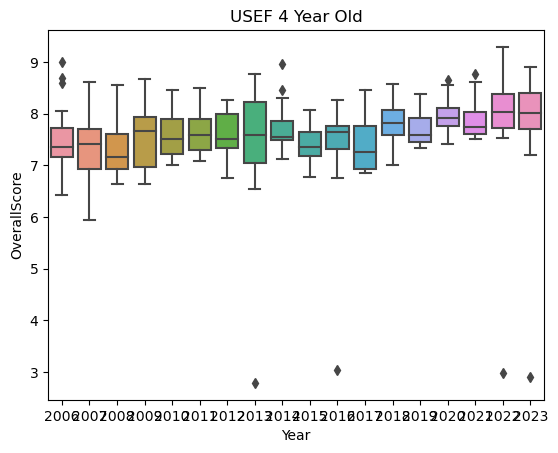

In [499]:
four_year_old_scores = total_horses = championship_df.loc[(championship_df["Division"].str.contains("USEF4"))]

# calculate IQR for column OverallScore
Q1 = four_year_old_scores['OverallScore'].quantile(0.25)
Q3 = four_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
ax = sns.boxplot(data=four_year_old_scores, x='Year', y='OverallScore')
plt.title('USEF 4 Year Old')
plt.savefig('images/usef4-boxplot.png')

# identify outliers
threshold = 1.5
outliers = four_year_old_scores[(four_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (four_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
four_year_old_scores = four_year_old_scores.drop(four_year_old_scores[four_year_old_scores['OverallScore'] <= 5.8].index)


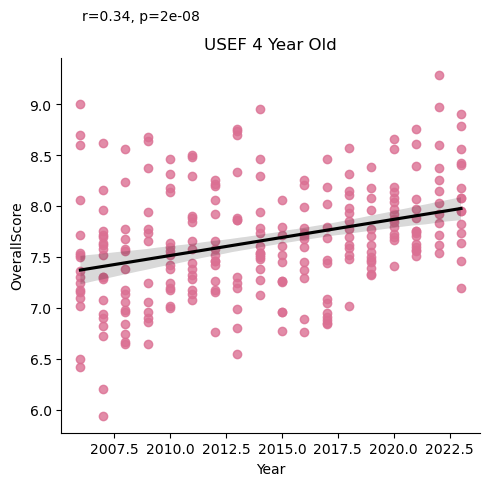

In [484]:
# create scatterplot of USEF Four Year Old division scores

four = sns.lmplot(data=four_year_old_scores, x="Year", y="OverallScore", col="Division", line_kws={'color': 'k'}, scatter_kws={'color': 'palevioletred'}).set(title='USEF 4 Year Old')
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    four = plt.gca()
    four.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=four.transAxes)
    
four.map_dataframe(annotate)
four.savefig('images/usef4-scatter.png')

|      |   Year | Division   | Horse                |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:---------------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|   14 |   2004 | FEI5       | Royal Prince         |                1 | Prix St. Georges | No    |      1016896 |          9.14  |
|   30 |   2004 | FEI5       | Finnegan             |               17 | Prix St. Georges | No    |        37180 |          6.22  |
|   31 |   2004 | FEI5       | Cacique              |               18 | I-1              | Yes   |      1007175 |          5.94  |
|  328 |   2010 | FEI5       | Desaronno            |               14 | I-A              | No    |      1078702 |          4.56  |
|  373 |   2011 | FEI5       | Folkestone OLD       |               15 | I-1              | Yes   |      1089283 |          3.112 |
|  500 |   2013 | FEI5       | Fashion Designer OLD |                1 | I-2

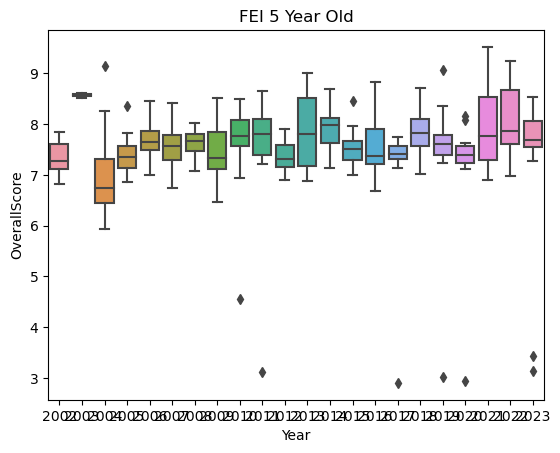

In [410]:


five_year_old_scores = total_horses = championship_df.loc[(championship_df["Division"].str.contains("FEI5"))]

# calculate IQR for column OverallScore
Q1 = five_year_old_scores['OverallScore'].quantile(0.25)
Q3 = five_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
sns.boxplot(data=five_year_old_scores, x='Year', y='OverallScore').set(title='FEI 5 Year Old')

# identify outliers
threshold = 1.5
outliers = five_year_old_scores[(five_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (five_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
five_year_old_scores = five_year_old_scores.drop(five_year_old_scores[five_year_old_scores['OverallScore'] <= 5.7].index)

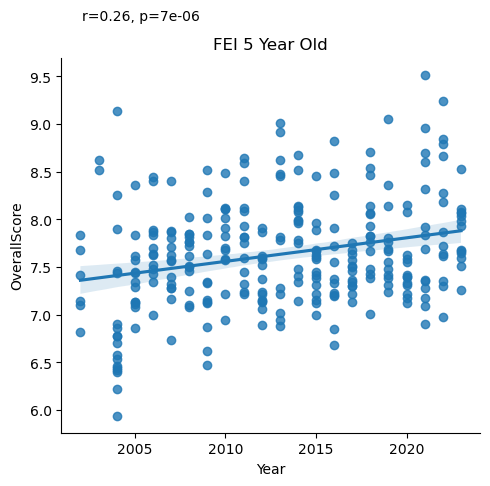

In [409]:
# create scatterplot of FEI 5 Year Old division scores

five = sns.lmplot(data=five_year_old_scores, x="Year", y="OverallScore", col="Division").set(title='FEI 5 Year Old')
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    five = plt.gca()
    five.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=five.transAxes)
    
five.map_dataframe(annotate)

|      |   Year | Division   | Horse                  |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:-----------------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|    6 |   2002 | FEI6       | Oleander               |                1 | Grand Prix       | Yes   |        35062 |          8.24  |
|    7 |   2002 | FEI6       | Freestyle              |                2 | Prix St. Georges | No    |        39380 |          7.4   |
|    8 |   2002 | FEI6       | Wincenzo               |                3 | Prix St. Georges | No    |      1026740 |          7     |
|    9 |   2002 | FEI6       | Olympus                |                4 | Grand Prix       | Yes   |        42683 |          6.86  |
|   12 |   2003 | FEI6       | Fabrice S              |                1 | Grand Prix       | Yes   |        42782 |          8.32  |
|   13 |   2003 | FEI6       | Persimmon ISF          |       

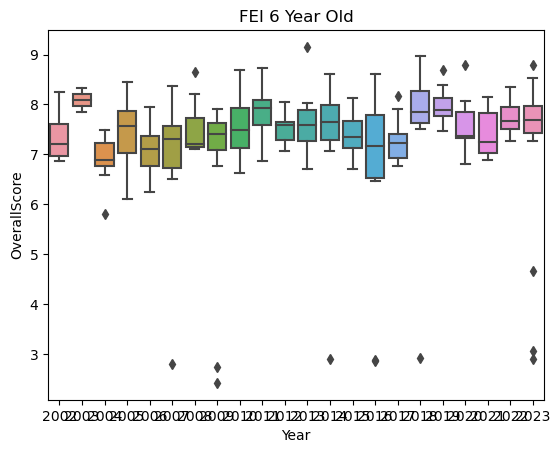

In [403]:
#  create linear regression model of FEI 6 Year Old scores

six_year_old_scores = total_horses = championship_df.loc[(championship_df["Division"].str.contains("FEI6"))]

# calculate IQR for column OverallScore
Q1 = six_year_old_scores['OverallScore'].quantile(0.25)
Q3 = six_year_old_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
sns.boxplot(data=six_year_old_scores, x='Year', y='OverallScore').set(title='FEI 6 Year Old')

# identify outliers
threshold = 1.5
outliers = six_year_old_scores[(six_year_old_scores['OverallScore'] < Q1 - threshold * IQR) | (six_year_old_scores['OverallScore'] > Q3 + threshold * IQR)]
#print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
six_year_old_scores = six_year_old_scores.drop(six_year_old_scores[six_year_old_scores['OverallScore'] <= 5.7].index)


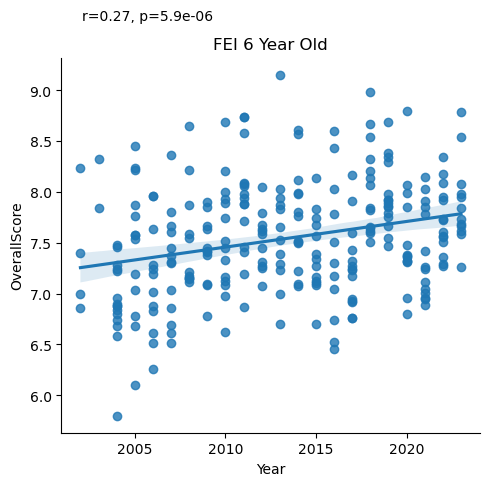

In [404]:
# create scatterplot of FEI 6 Year Old division scores

six = sns.lmplot(data=six_year_old_scores, x="Year", y="OverallScore", col="Division").set(title='FEI 6 Year Old')
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    six = plt.gca()
    six.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=six.transAxes)
    
six.map_dataframe(annotate)



|      |   Year | Division   | Horse                   |   OverallPlacing | HighestLevel     | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:------------------------|-----------------:|:-----------------|:------|-------------:|---------------:|
|  193 |   2008 | DHPSG      | Amidala                 |               17 | Grand Prix       | Yes   |      1031631 |         55.913 |
|  249 |   2009 | DHPSG      | Collector's Item        |               15 | I-1              | No    |      1035043 |         58.45  |
|  533 |   2014 | DHPSG      | Sanceo                  |                1 | Grand Prix       | Yes   |      1083924 |         76.515 |
| 1023 |   2021 | DHPSG      | WEC's Senor Rubinstein  |               14 | Grand Prix       | Yes   |      1124842 |         26.509 |
| 1024 |   2021 | DHPSG      | Atterupgaards Belafonte |               15 | I-1              | Yes   |      1145410 |         26.49  |
| 1161 |   2023 | DHPSG      | Giovanni-Bell           

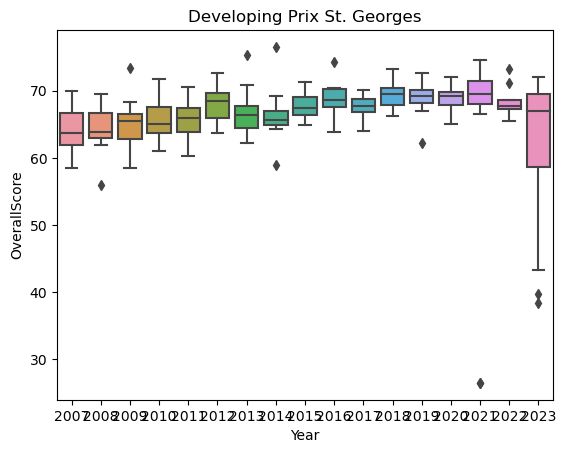

In [395]:
# select scores for Developing PSG division
dhpsg_scores = total_horses = championship_df.loc[(championship_df["Division"].str.contains("DHPSG"))]

# calculate IQR for column OverallScore
Q1 = dhpsg_scores['OverallScore'].quantile(0.25)
Q3 = dhpsg_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
sns.boxplot(data=dhpsg_scores, x='Year', y='OverallScore').set(title='Developing Prix St. Georges')

# identify outliers
threshold = 1.5
outliers = dhpsg_scores[(dhpsg_scores['OverallScore'] < Q1 - threshold * IQR) | (dhpsg_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
dhpsg_scores = dhpsg_scores.drop(dhpsg_scores[dhpsg_scores['OverallScore'] <= 54.000].index)



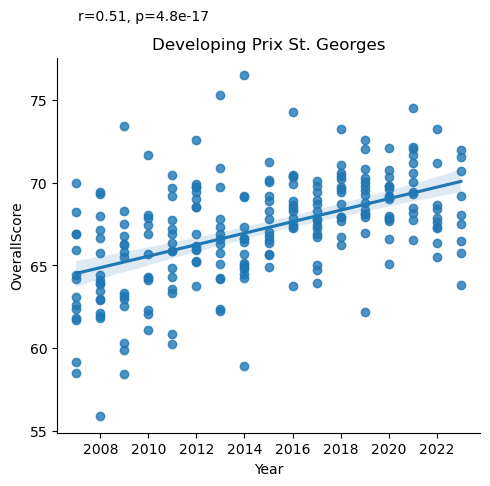

In [398]:
# create scatterplot of Developing Prix St. Georges division scores

dhpsg = sns.lmplot(data=dhpsg_scores, x="Year", y="OverallScore", col="Division").set(title='Developing Prix St. Georges')
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    dhpsg = plt.gca()
    dhpsg.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=dhpsg.transAxes)
    
dhpsg.map_dataframe(annotate)

|      |   Year | Division   | Horse                  |   OverallPlacing | HighestLevel   | CDI   |   USDFNumber |   OverallScore |
|-----:|-------:|:-----------|:-----------------------|-----------------:|:---------------|:------|-------------:|---------------:|
|  412 |   2012 | DHGP       | Veva Rose              |                9 | Grand Prix     | No    |      1091827 |         54.271 |
|  473 |   2013 | DHGP       | Elijah                 |                6 | I-2            | No    |      1013250 |         56.649 |
|  869 |   2019 | DHGP       | Faberge Blue           |               14 | Grand Prix     | Yes   |      1107486 |         25.666 |
|  870 |   2019 | DHGP       | Pik L's Donabella HU   |               15 | I-2            | No    |      1099805 |         23.254 |
|  998 |   2021 | DHGP       | Serenade MF            |                1 | Grand Prix     | Yes   |      1103046 |         75.519 |
| 1150 |   2023 | DHGP       | Incredible Jacky       |               10 | I

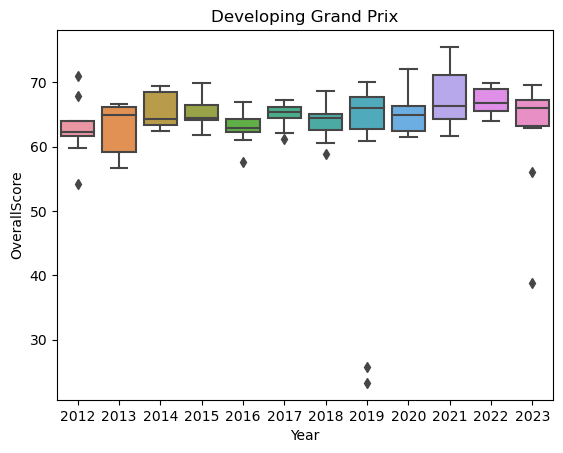

In [394]:
dhgp_scores = total_horses = championship_df.loc[(championship_df["Division"].str.contains("DHGP"))]

# calculate IQR for column OverallScore
Q1 = dhgp_scores['OverallScore'].quantile(0.25)
Q3 = dhgp_scores['OverallScore'].quantile(0.75)
IQR = Q3 - Q1

# create boxplot to visualize outliers
sns.boxplot(data=dhgp_scores, x='Year', y='OverallScore').set(title='Developing Grand Prix')

# identify outliers
threshold = 1.5
outliers = dhgp_scores[(dhgp_scores['OverallScore'] < Q1 - threshold * IQR) | (dhgp_scores['OverallScore'] > Q3 + threshold * IQR)]
print(outliers.to_markdown())

# drop the outliers that are the result of horses participating in only one half of the competition, resulting in an artificially low score
dhgp_scores = dhgp_scores.drop(dhgp_scores[dhgp_scores['OverallScore'] <= 54.000].index)


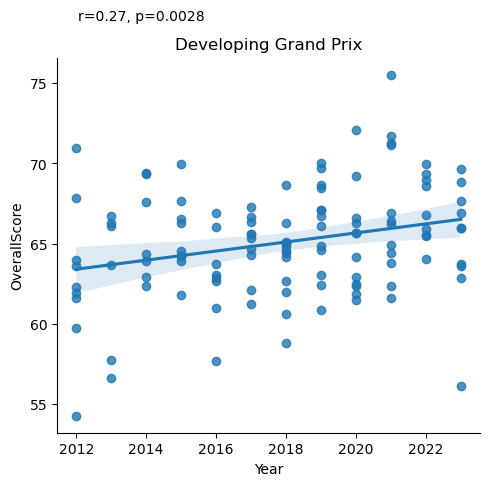

In [399]:
# create scatterplot of Developing Grand Prix division scores

gp = sns.lmplot(data=dhgp_scores, x="Year", y="OverallScore", col="Division").set(title='Developing Grand Prix')
def annotate(data, **kws):
    r, p = st.pearsonr(data['Year'], data['OverallScore'])
    gp = plt.gca()
    gp.text(.05, 1.1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=gp.transAxes)
    
gp.map_dataframe(annotate)

## Bloodline and Breeding Data Analysis, 2002-2023

In [100]:
# get the number of horses bred in the USA that competed in the years 2002-2023

usa_count = horse_df[(horse_df["Country"] == "USA")].count()["USDFNumber"]

print(f"{usa_count} horses were bred in the USA.")

307 horses were bred in the USA.


In [116]:
country_groups = horse_df.groupby("Country")["USDFNumber"].count()
country_groups




Country
Australia          1
Belgium            7
Brazil             1
Canada             7
Colombia           1
Denmark           26
France             1
Germany          299
Great Britain      5
Italy              1
Netherlands      165
Norway             4
Portugal           1
Spain              5
Sweden             2
USA              307
Name: USDFNumber, dtype: int64

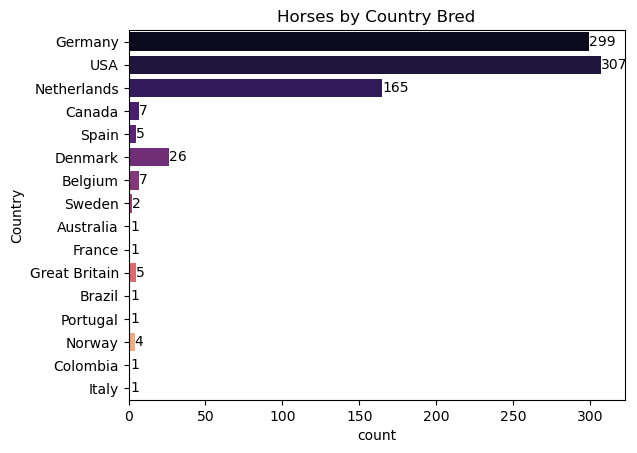

In [310]:
# create a bar chart of horses by country bred

country_chart = sns.countplot(
   y = 'Country',
   data = horse_df,
   palette = 'magma'
)

country_chart.bar_label(country_chart.containers[0])

plt.title("Horses by Country Bred")
plt.show()

In [29]:
# get the percentage of horses bred in the USA

all_horses = len(horse_df)
usa_percentage = (usa_count / all_horses) * 100
usa_percentage = round(usa_percentage, 2)

print(f"The percentage of horses bred in the USA is {usa_percentage}%.")

The percentage of horses bred in the USA is 36.5%


In [23]:
# get the top ten sires represented over all years (2002-2023)
# showing 11 horses, as there are three horses tied for the 9th place spot

top_sires = horse_df['Sire'].value_counts().head(11)

print(top_sires)


Sandro Hit          24
Sir Donnerhall I    18
Furstenball         17
Jazz                13
Rotspon             12
Fidertanz           12
Florestan I         12
Hotline             10
Sir Sinclair         9
Florencio I          9
Grand Galaxy Win     9
Name: Sire, dtype: int64

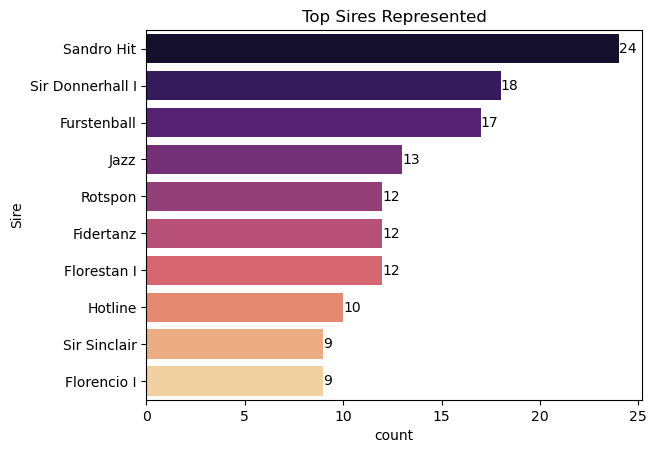

In [311]:
sire_chart = sns.countplot(
   y = 'Sire',
   data = horse_df,
   palette = 'magma',
   order = horse_df["Sire"].value_counts().iloc[:10].index
)
sire_chart.bar_label(sire_chart.containers[0])

plt.title("Top Sires Represented")
plt.show()

In [24]:
# get the top ten sires of Grand Prix horses from 2002-2023

gp_sires = horse_df.loc[(horse_df["HighestLevel"] == "Grand Prix")]
gp_sires = gp_sires['Sire'].value_counts().head(10)

print(gp_sires)

Sandro Hit          12
Jazz                 8
Sir Donnerhall I     7
Florestan I          5
Florencio I          5
Fidertanz            4
Quaterback           4
Rotspon              4
Belissimo M          4
Furstenball          3
Name: Sire, dtype: int64

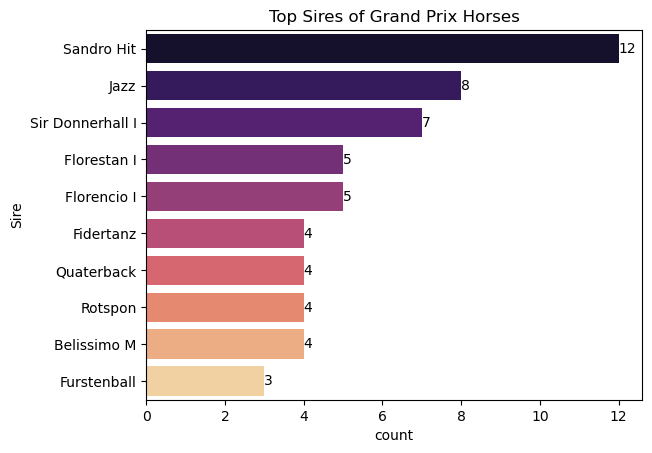

In [316]:
# create a chart of the top ten sires of Grand Prix horses

gp_sire_group = horse_df.loc[(horse_df["HighestLevel"] == "Grand Prix")]

gp_sire_chart = sns.countplot(
   y = gp_sire_group['Sire'],
   data = gp_sire_group,
   palette = 'magma',
   order = gp_sire_group["Sire"].value_counts().iloc[:10].index
)
gp_sire_chart.bar_label(gp_sire_chart.containers[0])

plt.title("Top Sires of Grand Prix Horses")
plt.show()

In [372]:
# get the top ten damsires represented over all years (2002 - 2023)

top_damsires = horse_df['Damsire'].value_counts().head(10)

print(top_damsires)

Rubinstein          25
De Niro             18
Sandro Hit          17
Jazz                16
Rotspon             16
Weltmeyer           14
Ferro               13
Krack C             11
Sir Donnerhall I    11
Rohdiamant          11
Name: Damsire, dtype: int64

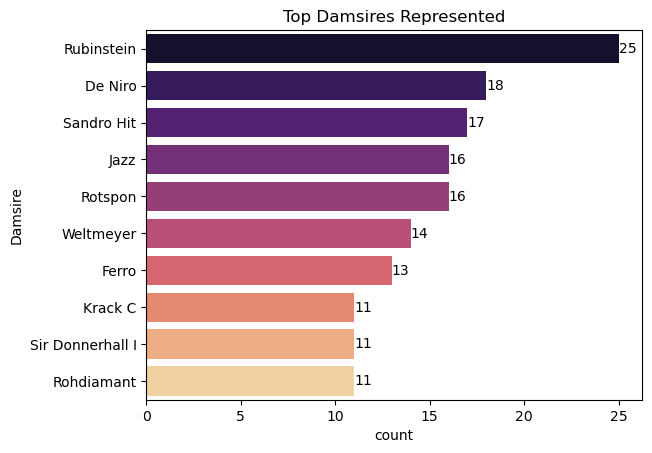

In [313]:
damsire_chart = sns.countplot(
   y = 'Damsire',
   data = horse_df,
   palette = 'magma',
   order = horse_df["Damsire"].value_counts().iloc[:10].index
)
damsire_chart.bar_label(damsire_chart.containers[0])

plt.title("Top Damsires Represented")
plt.show()

In [374]:
# get the top ten damsires of Grand Prix horses from 2002-2023

gp_damsires = horse_df.loc[(horse_df["HighestLevel"] == "Grand Prix")]
gp_damsires = gp_damsires['Damsire'].value_counts().head(10)

print(gp_damsires)

De Niro           7
Rubinstein        6
Rotspon           6
Brentano II       5
Ferro             5
Weltmeyer         4
Rohdiamant        4
Jazz              4
Flemmingh         3
Wolkenstein II    3
Name: Damsire, dtype: int64

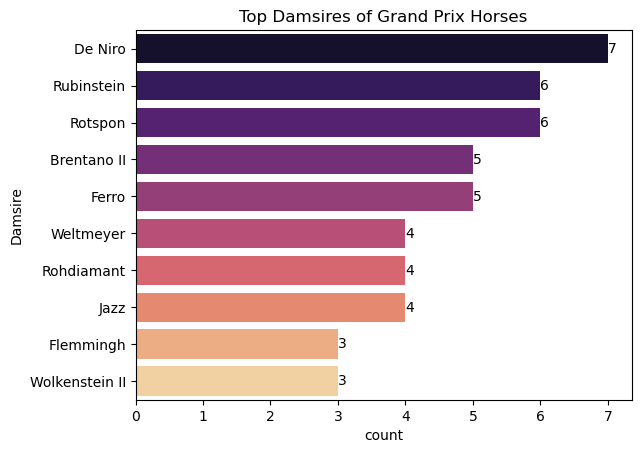

In [315]:
# create bar chart of top ten damsires of Grand Prix horses

gp_damsire_group = horse_df.loc[(horse_df["HighestLevel"] == "Grand Prix")]

gp_damsire_chart = sns.countplot(
   y = gp_damsire_group['Damsire'],
   data = gp_damsire_group,
   palette = 'magma',
   order = gp_damsire_group["Damsire"].value_counts().iloc[:10].index
)
gp_damsire_chart.bar_label(gp_damsire_chart.containers[0])

plt.title("Top Damsires of Grand Prix Horses")
plt.show()

In [364]:
# get the top ten most prominent breeders represented over all years (2002 - 2023)

top_breeders = horse_df['Breeder'].value_counts().head(10)

print(top_breeders)

DG Bar Ranch          16
Maryanna Haymon       12
Nancy Holowesko        9
Leatherdale Farms      7
Gestut Lewitz          6
Oak Hill Ranch         6
Judy Yancey            6
Horses Unlimited       6
Jackie Ahl-Eckhaus     5
Maurine Swanson        5
Name: Breeder, dtype: int64

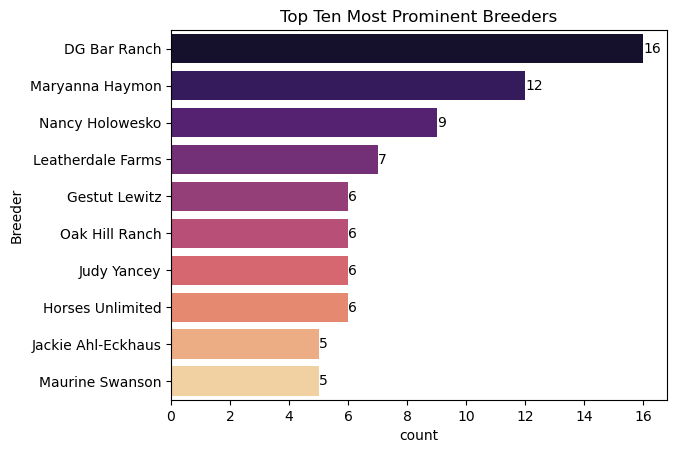

In [317]:
breeder_chart = sns.countplot(
   y = 'Breeder',
   data = horse_df,
   palette = 'magma',
   order = horse_df["Breeder"].value_counts().iloc[:10].index
)
breeder_chart.bar_label(breeder_chart.containers[0])

plt.title("Top Ten Most Prominent Breeders")
plt.show()

In [366]:
# get the top ten countries that horses were bred in over all years (2002 - 2023)

top_countries = horse_df['Country'].value_counts().head(10)

print(top_countries)

USA              307
Germany          299
Netherlands      165
Denmark           26
Canada             7
Belgium            7
Spain              5
Great Britain      5
Norway             4
Sweden             2
Name: Country, dtype: int64

In [40]:
# get the top ten studbooks represented over all years (2002 - 2023)

top_studbooks = horse_df['Studbook'].value_counts().head(10)

print(top_studbooks)

KWPN                  243
Hanoverian            241
Oldenburg             180
Westfalen              48
Danish Warmblood       34
Rhinelander            18
American Warmblood     10
PRE                     7
Holsteiner              7
Swedish Warmblood       6
Name: Studbook, dtype: int64


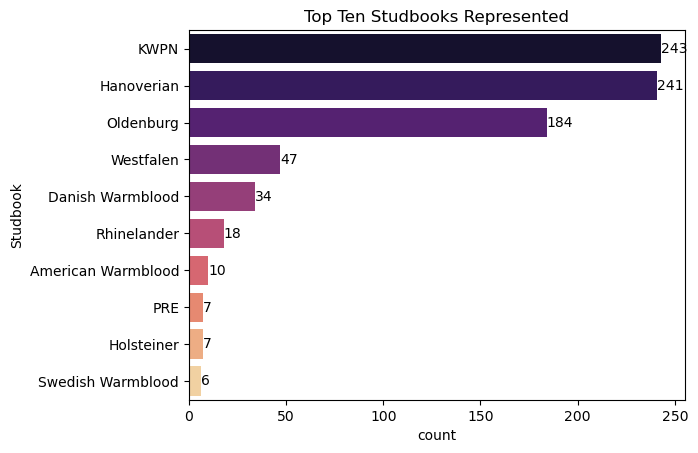

In [318]:
studbook_chart = sns.countplot(
   y = 'Studbook',
   data = horse_df,
   palette = 'magma',
   order = horse_df["Studbook"].value_counts().iloc[:10].index
)
studbook_chart.bar_label(studbook_chart.containers[0])

plt.title("Top Ten Studbooks Represented")
plt.show()

In [368]:
# get the top horses with the most championship appearances over all years (2002 - 2023)

most_appearances = championship_df['Horse'].value_counts().head(10)

print(most_appearances)

WakeUp                  6
Quantum Jazz            5
Flavius MF              5
Sole Mio                5
Sternlicht Hilltop      5
Floretienne             5
Pikko del Cerro HU      5
Fashion Designer OLD    5
Don Cesar               5
Au Revoir               5
Name: Horse, dtype: int64

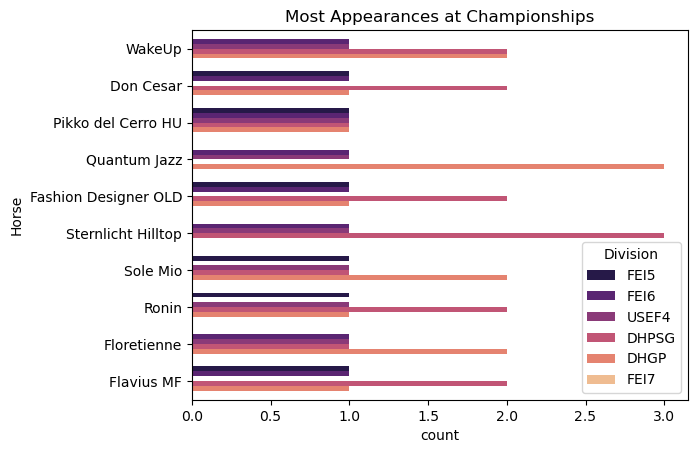

In [321]:
sns.countplot(
   y = 'Horse',
   data = championship_df,
   palette = 'magma',
   order = championship_df["Horse"].value_counts().iloc[:10].index,
   hue = 'Division'
)

plt.title("Most Appearances at Championships")
plt.show()